## Load Packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [19]:
import numpy as np
import pandas as pd
import plotnine
from plotnine import ggplot, aes

## Load Data

In [5]:
data = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
data.shape

(2580, 81)

In [6]:
data.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [7]:
data.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


## Select Data for EDA

In [161]:
eda_cols = ['PID','SalePrice','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
            'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF']

In [84]:
base = data[eda_cols]
base.head()

,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF
1,909176150,126000,TA,TA,No,Rec,Unf,238.0,0.0,1.0,0.0,618.0,856.0,856,0
2,905476230,139500,Gd,TA,Mn,GLQ,ALQ,552.0,393.0,1.0,0.0,104.0,1049.0,1049,0
3,911128020,124900,TA,TA,No,ALQ,Unf,737.0,0.0,0.0,0.0,100.0,837.0,1001,0
4,535377150,114000,Fa,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,405.0,405.0,717,0
5,534177230,227000,Gd,TA,No,GLQ,Unf,643.0,0.0,1.0,0.0,167.0,810.0,810,0


In [80]:
base.isnull().sum()

PID              0
SalePrice        0
BsmtQual        69
BsmtCond        69
BsmtExposure    71
BsmtFinType1    69
BsmtFinType2    70
BsmtFinSF1       1
BsmtFinSF2       1
BsmtFullBath     2
BsmtHalfBath     2
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
LowQualFinSF     0
dtype: int64

## Sales Price vs Continuous Variables

#### Sales Price vs SF

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


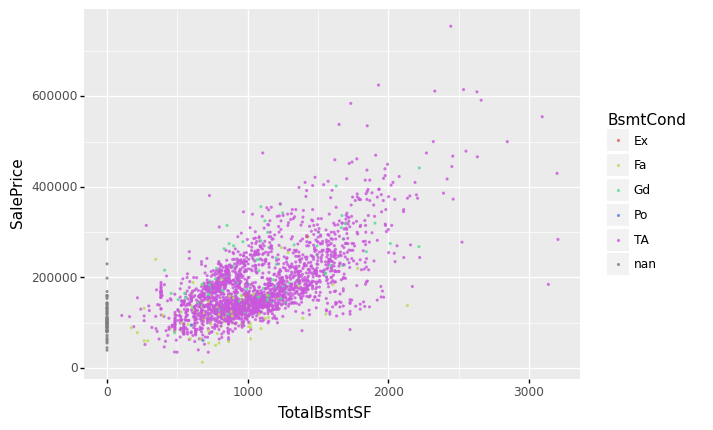

In [182]:
#sales price vs SF - syntax example

SP_TotalBsmtSF = ggplot(data=base, mapping=aes(x='TotalBsmtSF',y='SalePrice'))

(SP_TotalBsmtSF + 
 plotnine.geom_point(mapping=aes(color='BsmtCond'),size=0.3, alpha=.7)
).draw();

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


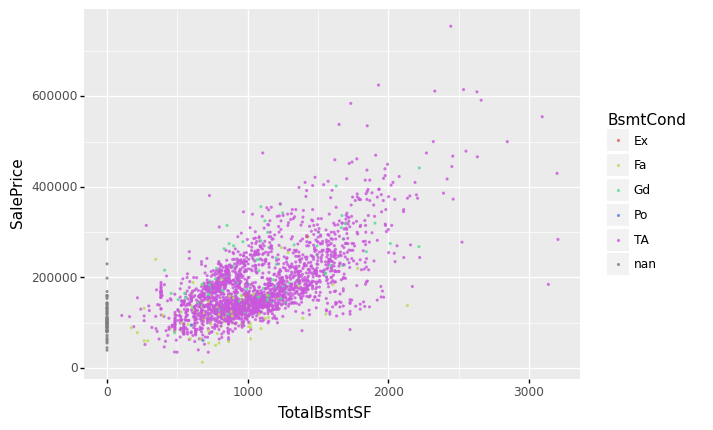

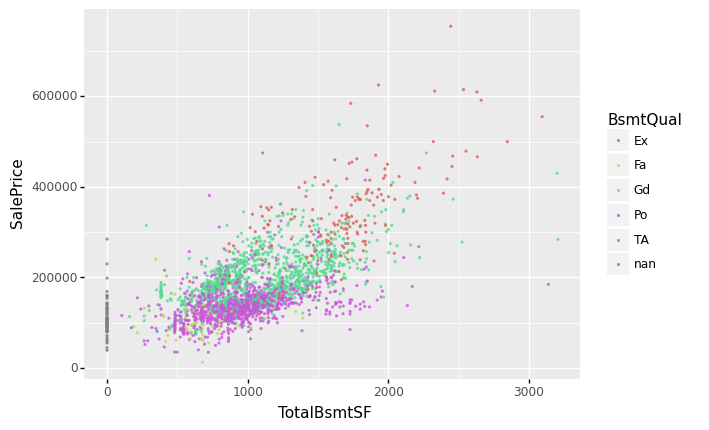

In [43]:
#sales price vs SF

(ggplot(data=base, mapping=aes(x='TotalBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtCond'),size=0.3, alpha=.7)
).draw();

(ggplot(data=base, mapping=aes(x='TotalBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtQual'),size=0.3, alpha=.7)
).draw();

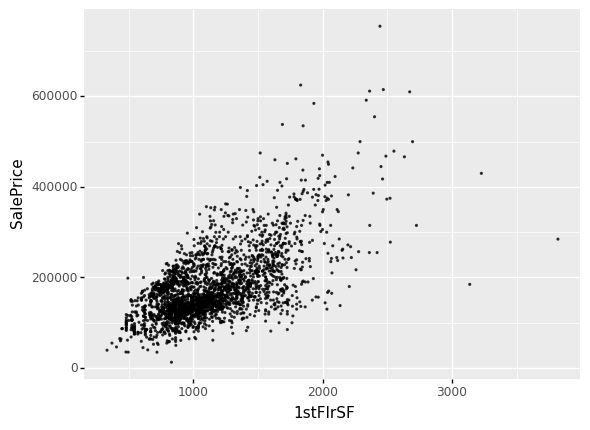

In [170]:
(ggplot(data=base, mapping=aes(x='1stFlrSF',y='SalePrice')) + 
 plotnine.geom_point(size=0.3, alpha=.7)
).draw();

Is basement square footage relevant to sales price in comparison to 1str floorw (which seems more broadly useful)?

/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:>

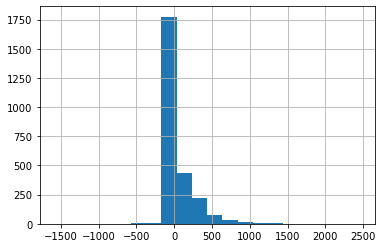

In [181]:
base['1st_base_diff'] = np.where(base['TotalBsmtSF']>0,base['1stFlrSF'] - base['TotalBsmtSF'],0)

base['1st_base_diff'].hist(bins=20)

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


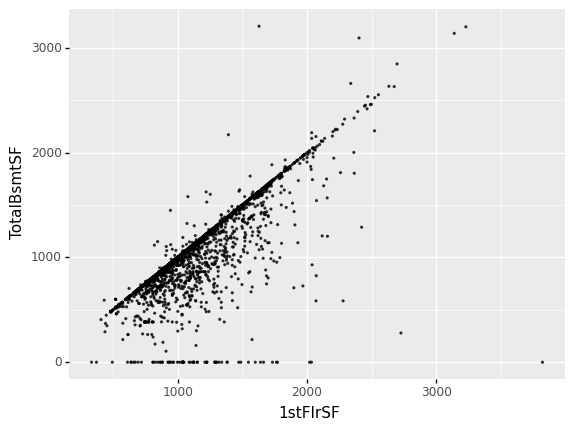

In [187]:
(ggplot(data=base, mapping=aes(x='1stFlrSF',y='TotalBsmtSF')) + 
 plotnine.geom_point(size=0.3, alpha=.7)
).draw();

(ggplot(data=base, mapping=aes(x='TotalBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtCond'),size=0.3, alpha=.7)
).draw();

#### Basement Finish

- there are 0 houses with BsmtFinType1 = Unf
- there is 1 house with BsmtFinType2 = Unf, and it only has 6 unifinished feet
- Unf category just signials there is no finish


In [70]:
base.BsmtFinType1.value_counts()

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
Name: BsmtFinType1, dtype: int64

In [71]:
base.BsmtFinType2.value_counts()

Unf    2180
Rec      97
LwQ      84
BLQ      64
ALQ      53
GLQ      32
Name: BsmtFinType2, dtype: int64

In [138]:
x = base.loc[base['BsmtFinType1'] == 'Unf']
x.head()

,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,FinBsmtSF,BaseBaths
4,535377150,114000,Fa,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,405.0,405.0,717,0,0.0,0.0
7,902135020,93000,Fa,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,936.0,936.0,936,0,0.0,0.0
8,528228540,187687,Gd,TA,Gd,Unf,Unf,0.0,0.0,0.0,0.0,1146.0,1146.0,1246,0,0.0,0.0
13,902204080,80000,Fa,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,861.0,861.0,861,0,0.0,0.0
21,531376060,181000,Gd,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,1461.0,1461.0,1486,0,0.0,0.0


In [139]:
x[x['BsmtFinSF1']>0]

,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,FinBsmtSF,BaseBaths


In [109]:
x = base.loc[base['BsmtFinType2'] == 'Unf']
x
x[x['BsmtFinSF2']>0]

,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF
806,527455030,142500,Gd,TA,No,GLQ,Unf,632.0,6.0,0.0,0.0,423.0,1061.0,1055,0


/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


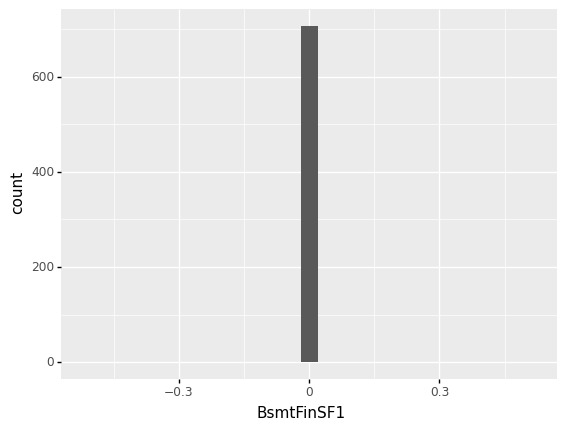

In [144]:
(ggplot(data=x, mapping=aes(x='BsmtFinSF1')) + plotnine.geom_histogram()).draw();

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.


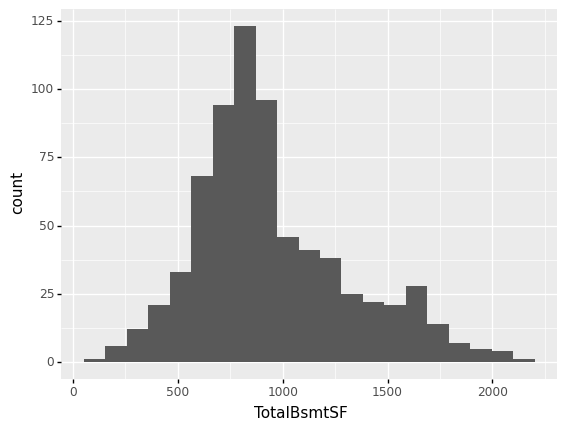

In [145]:
(ggplot(data=x, mapping=aes(x='TotalBsmtSF')) + plotnine.geom_histogram()).draw();

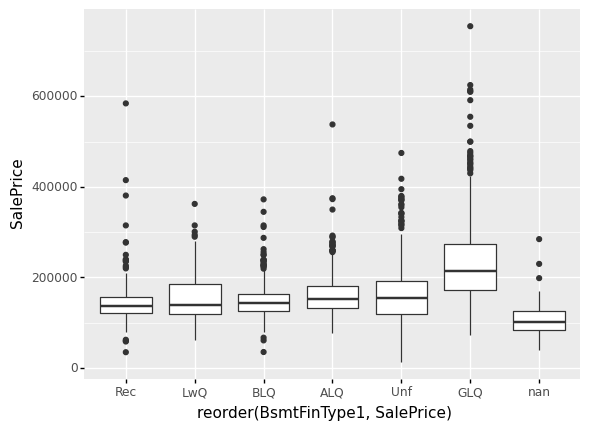

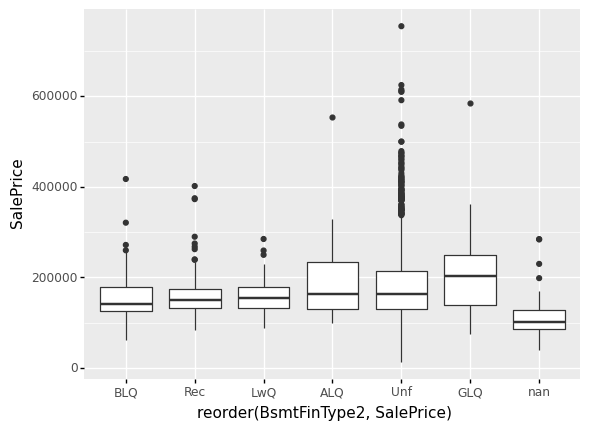

In [188]:
#if type 1 = unfinished the entiure basement is unfinished

(ggplot(data=base, mapping=aes(x='reorder(BsmtFinType1, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();


#so few of these by comparison, hard to tell if it matters
(ggplot(data=base, mapping=aes(x='reorder(BsmtFinType2, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

In [167]:
#impute unfinished SF values into Type1 and Type2 SF columns

#if BsmtFinType1 == Unf, we know all unf square footage is in this column
base['BsmtFinSF1'] = np.where(base['BsmtFinType1']=='Unf',base['BsmtUnfSF'],base['BsmtFinSF1'])

#new row to hold values for remaining SF (not all rows are correct)
base['BasementType2Unf'] = base['TotalBsmtSF'] - base['BsmtFinSF1']
base['BsmtFinSF2'] = np.where(base['BsmtFinType2']=='Unf',base['BasementType2Unf'],base['BsmtFinSF2'])


/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


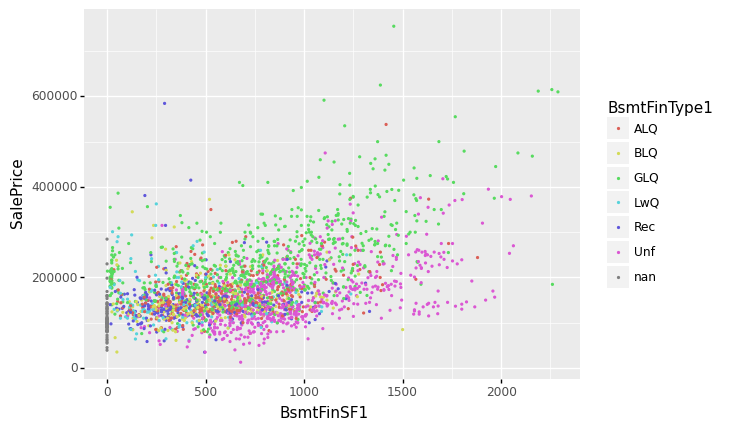

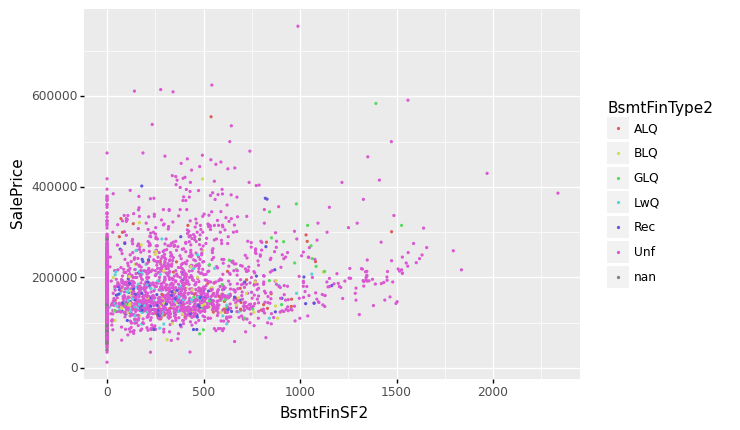

In [168]:
(ggplot(data=base, mapping=aes(x='BsmtFinSF1', y='SalePrice',color='BsmtFinType1'))+
 plotnine.geom_point(size=.3)
).draw();

(ggplot(data=base, mapping=aes(x='BsmtFinSF2', y='SalePrice',color='BsmtFinType2'))+
 plotnine.geom_point(size=.3)
).draw();

- GLQ seems to be the only significant finish
- Srikar can you advise the right what to test significance of that hypothesis?

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


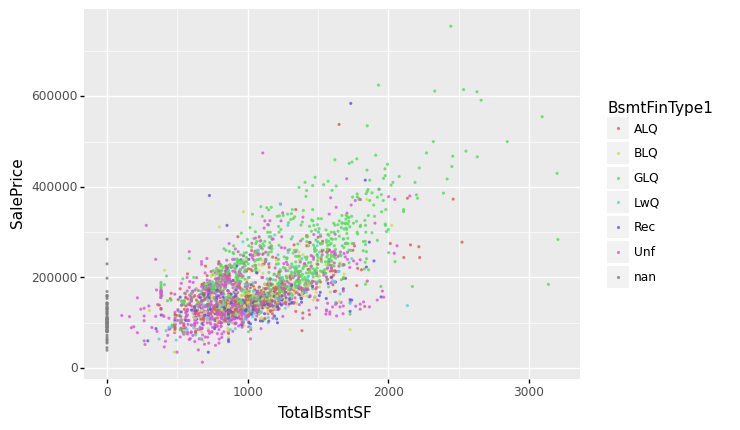

In [186]:
(ggplot(data=base, mapping=aes(x='TotalBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtFinType1'),size=0.3, alpha=.7)
).draw();

In [112]:
base['FinBsmtSF'] = base['TotalBsmtSF'] - base['BsmtUnfSF']
base

/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PID,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,FinBsmtSF
1,909176150,126000,TA,TA,No,Rec,Unf,238.0,0.0,1.0,0.0,618.0,856.0,856,0,238.0
2,905476230,139500,Gd,TA,Mn,GLQ,ALQ,552.0,393.0,1.0,0.0,104.0,1049.0,1049,0,945.0
3,911128020,124900,TA,TA,No,ALQ,Unf,737.0,0.0,0.0,0.0,100.0,837.0,1001,0,737.0
4,535377150,114000,Fa,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,405.0,405.0,717,0,0.0
5,534177230,227000,Gd,TA,No,GLQ,Unf,643.0,0.0,1.0,0.0,167.0,810.0,810,0,643.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,121000,TA,TA,No,Unf,Unf,0.0,0.0,0.0,0.0,952.0,952.0,952,0,0.0
760,905402060,139600,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1733,0,0.0
761,909275030,145000,TA,TA,No,BLQ,Unf,284.0,0.0,0.0,0.0,717.0,1001.0,1001,0,284.0
762,907192040,217500,Gd,TA,No,GLQ,Unf,841.0,0.0,1.0,0.0,144.0,985.0,985,0,841.0


/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


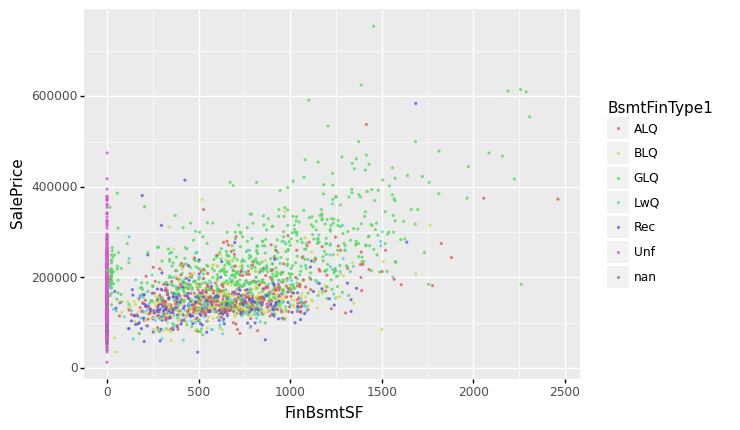

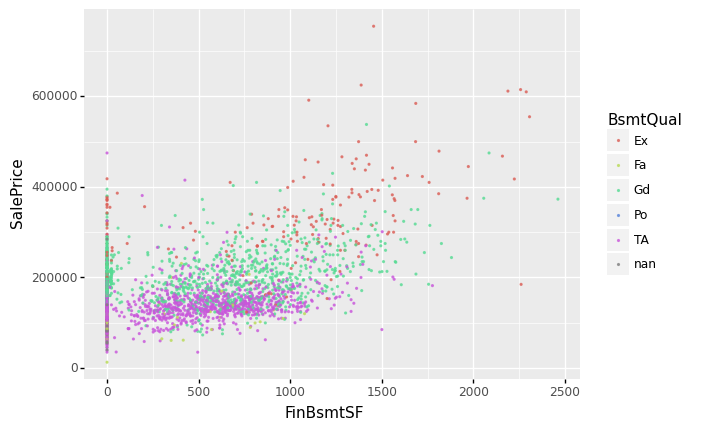

In [169]:
#sales price vs FinSF

(ggplot(data=base, mapping=aes(x='FinBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtFinType1'),size=0.3, alpha=.7)
).draw();

(ggplot(data=base, mapping=aes(x='FinBsmtSF',y='SalePrice')) + 
 plotnine.geom_point(mapping=aes(color='BsmtQual'),size=0.3, alpha=.7)
).draw();

- at a glance seems quality (height) is more important to price than finished square footage

### Sales Price vs Categoricals

#### Quality

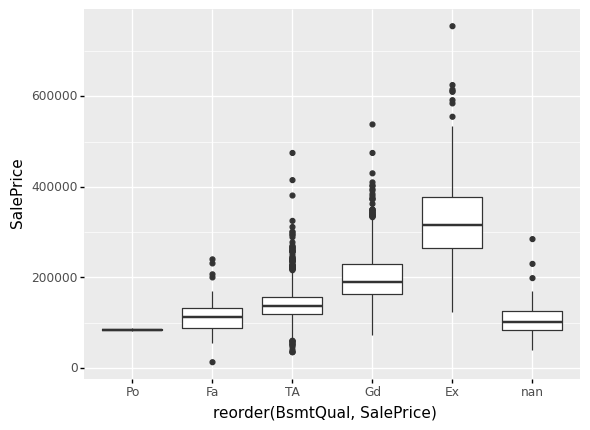

In [189]:
#sales price vs Exposure

(ggplot(data=base, mapping=aes(x='reorder(BsmtQual, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

#### Cond

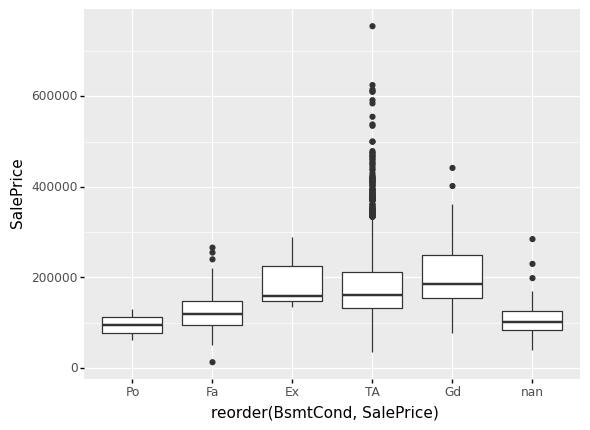

In [190]:
(ggplot(data=base, mapping=aes(x='reorder(BsmtCond, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

#### Exposure

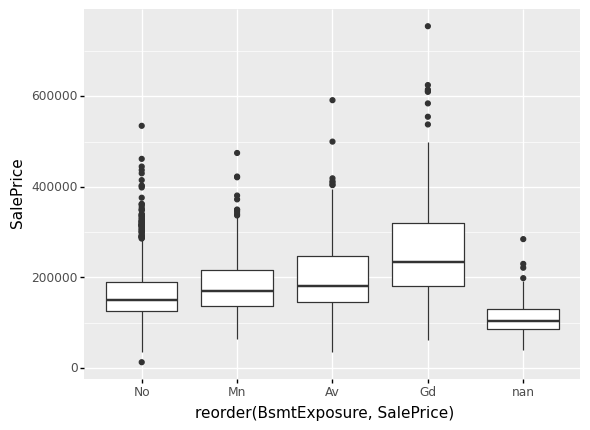

In [115]:
#sales price vs Exposure

(ggplot(data=base, mapping=aes(x='reorder(BsmtExposure, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

####  Basement Baths

In [130]:
base.BsmtFullBath.value_counts()

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


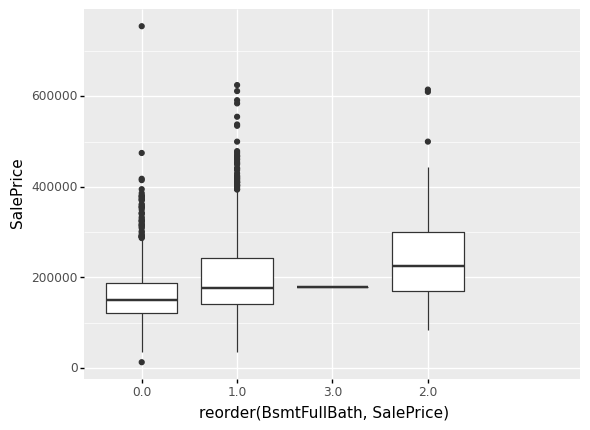

In [131]:
(ggplot(data=base, mapping=aes(x='reorder(BsmtFullBath, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

In [125]:
base.BsmtHalfBath.value_counts()

0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


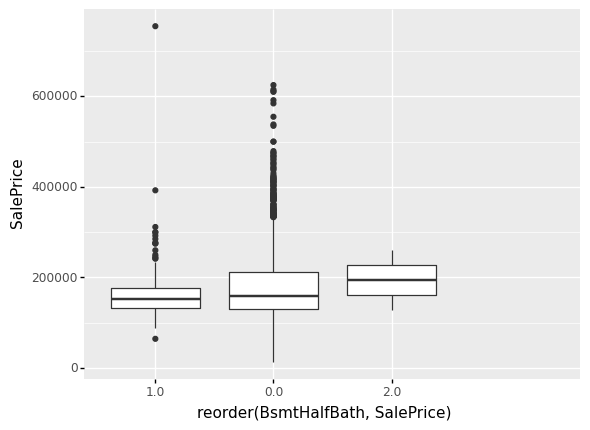

In [128]:
(ggplot(data=base, mapping=aes(x='reorder(BsmtHalfBath, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

Can we encode these into a single row?
- full baths = 1,2,3
- count each half bath as 0.25 (one half bath would result in #.25, two would result in #.5)
- there are no quarter baths to consider


- team help verify results make sense
- consder count of full baths = 1065, but drops to 1050 in after encoding
- there are 14 1.25 and 1 1.50, so total houses with 1 full bath adds up to 1065

In [123]:
base['BaseBaths'] = base['BsmtFullBath'] + base['BsmtHalfBath']*.25
base['BaseBaths'].value_counts()

/home/jgoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.00    1342
1.00    1050
0.25     142
2.00      27
1.25      14
3.00       1
1.50       1
0.50       1
Name: BaseBaths, dtype: int64

/home/jgoud/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


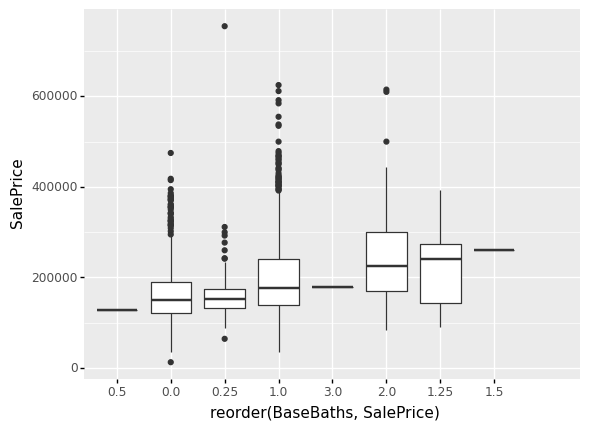

In [126]:
(ggplot(data=base, mapping=aes(x='reorder(BaseBaths, SalePrice)', y='SalePrice'))+
 plotnine.geom_boxplot()
).draw();

- suspect best factors would be <1 bath, 1 bath, >1 bath

- 0.5 (two halfs), 3.0, and 1.5 probably don't have enough data but fall in proposed ranges